In [ ]:
 from google.colab import drive
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_imagenes.p'

file = open(filename, 'rb')
data = pickle.load(file)
file.close()

nombres= data['nombres']
imagenes = data['imagenes']

Mounted at /content/drive


Grafico de algun pokemon como ejemplo

reuniclus
(56, 68)


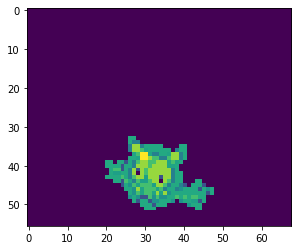

In [ ]:
n=420
plt.imshow(imagenes[n])
print(nombres[n])
print(imagenes[n].shape)

In [ ]:
filename = '/content/drive/My Drive/LaboDatos2022/TerceraEjercitacion/pokemon_dataframe.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,level_0,index,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,0,0,1,bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,1,1,1,2,ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,2,2,2,3,venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,3,4,4,charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,4,4,5,5,charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [ ]:
data = np.zeros((len(nombres),56*68))
for n,img in enumerate(imagenes):
  img.resize(56*68)
  data[n,:] = img

Ejercicio 1

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Por default se usan k=8 clusters para kmeans. Igualmente verifico mediante el criterio de la silueta.

In [ ]:
silhouette_coefficients = []
for k in range(2, 20):
     kkkmeans = KMeans(n_clusters=k)
     kkkmeans.fit(data)
     score = silhouette_score(data, kkkmeans.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

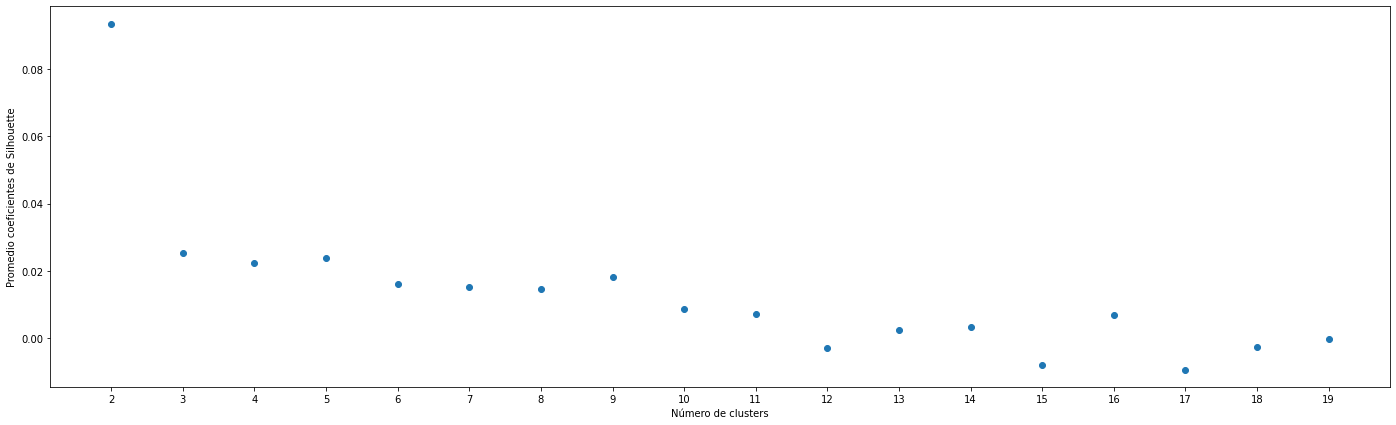

In [ ]:
fig, ax = plt.subplots(figsize = (24, 7))
ax.scatter(range(2, 20), silhouette_coefficients)
ax.set_xticks(range(2, 20))
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Promedio coeficientes de Silhouette")

Al correr el programa distintas veces obtengo distintos maximos locales. La mayoria son cercanos a 8, por eso tomo k=8.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [ ]:
print('Dimensión de los datos {}'.format(data.shape))

Dimensión de los datos (698, 3808)


Creo un modelo PCA para analizar las 100 componentes principales.

In [ ]:
pca = PCA(n_components = 100)
pca.fit(data)
X_pca = pca.transform(data)

Visualizo las primeras 2

Text(0, 0.5, 'Segunda componente principal')

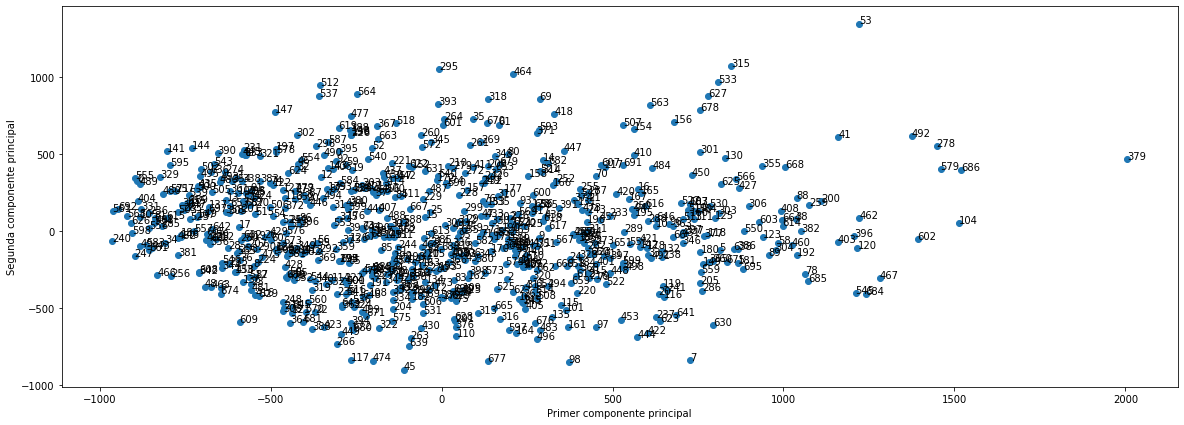

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1])

for i in range(data.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Armo los 8 clusters

In [ ]:
kmeans = KMeans(n_clusters=8)

kmeans.fit(X_pca)

KMeans()

Ejercicio 2

In [ ]:
centroids = kmeans.cluster_centers_

print("Shape de los centroids:",centroids.shape)

print(centroids[:5,[0,1]])

Shape de los centroids: (8, 100)
[[-660.7207911   162.56170545]
 [ 234.94607222 -260.17121222]
 [ 493.56810408   46.72790698]
 [-281.46455176 -322.2874787 ]
 [ 902.88148715  424.30343133]]


Ahora veo los 8 clusters con sus respectivos centroides en las dos componentes principales.

No handles with labels found to put in legend.


Text(0, 0.5, 'Segunda componente principal')

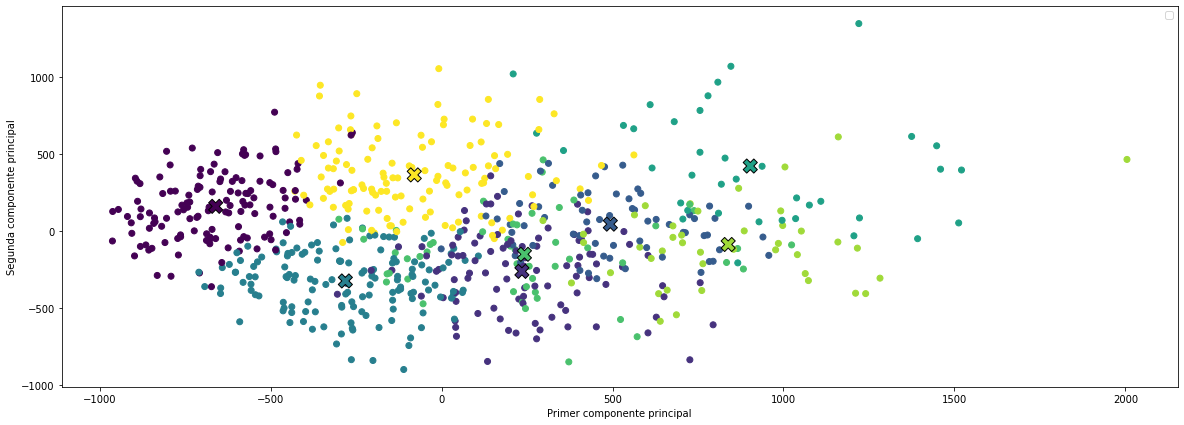

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')
ax.legend()

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Ejercicio 3

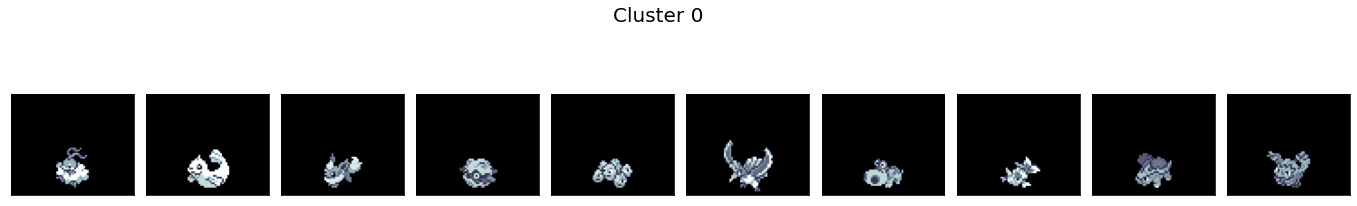

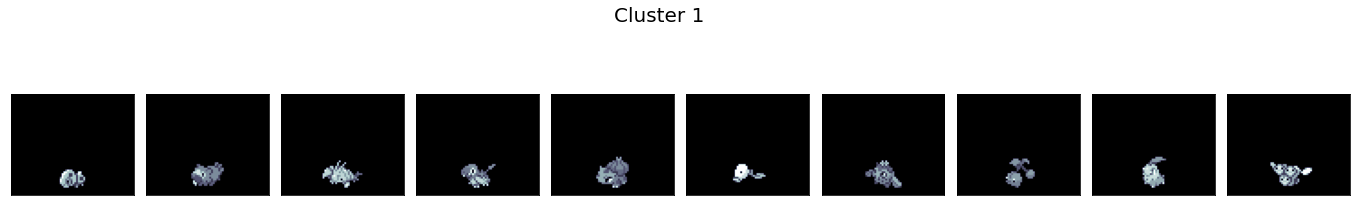

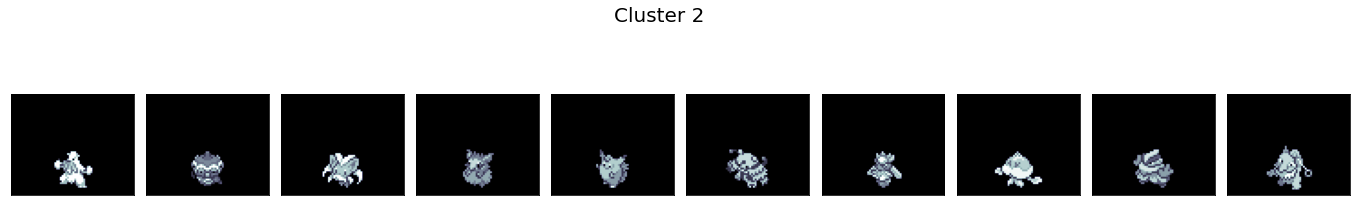

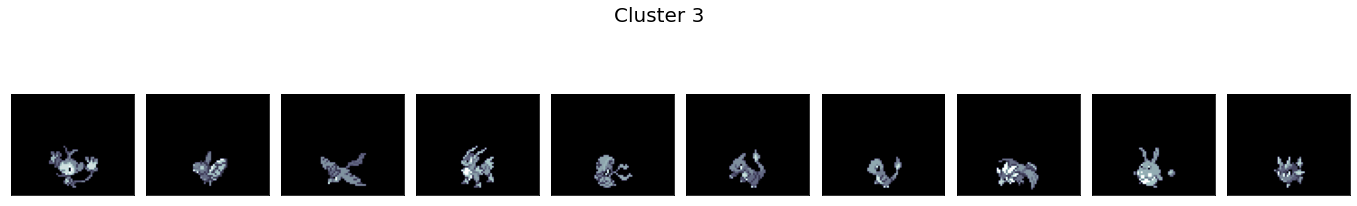

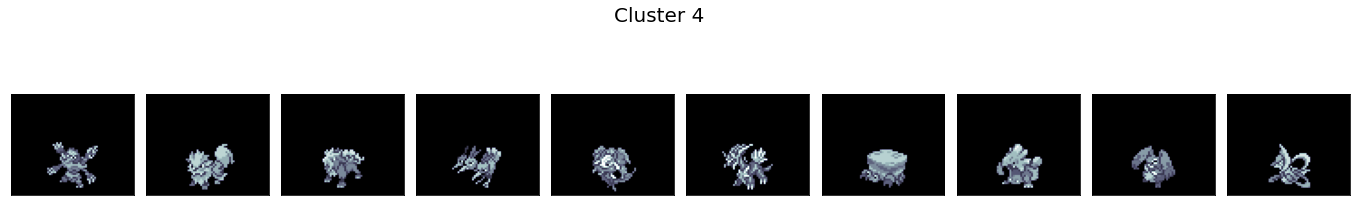

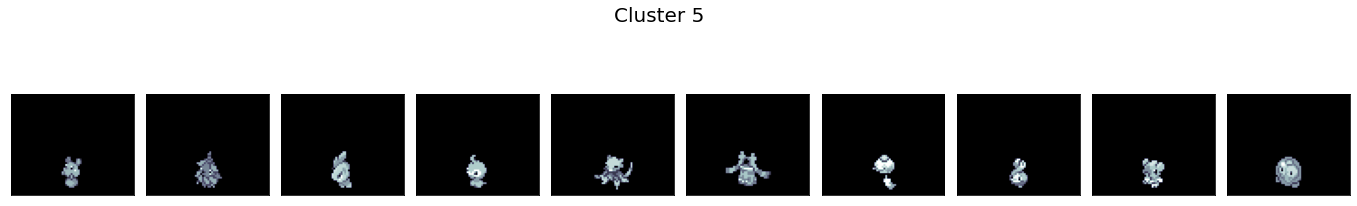

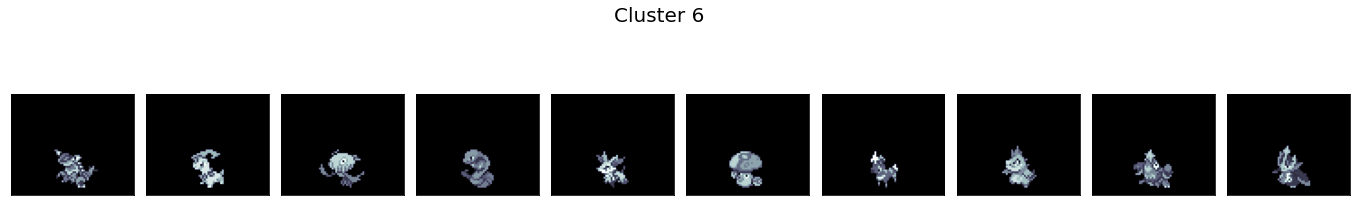

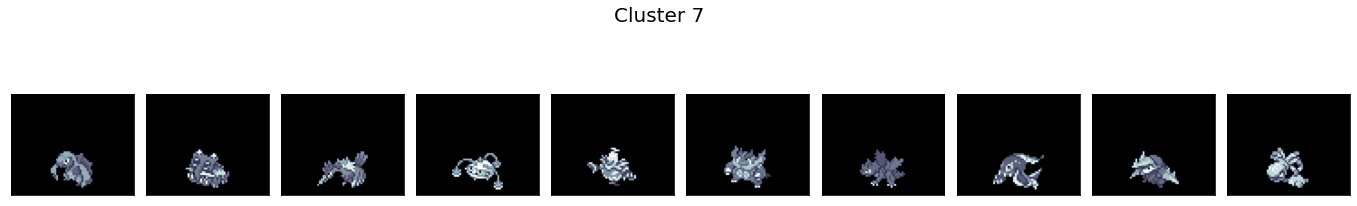

In [ ]:
labels = kmeans.labels_

for i in range(8):
    index = np.nonzero(labels==i)[0]
    num = 10
    this_pokemons = data[index].reshape(len(index),56,68)
    fig, axes = plt.subplots(1, num, figsize=(24, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    fig.suptitle("Cluster " + str(i), fontsize=20)
    for i, ax in enumerate(axes.flat):
        ax.imshow(this_pokemons[i], cmap='bone')

Ejercicio 4

Armo una lista de listas con los nombres de los pokemones de cada cluster

In [ ]:
array_nombres = np.array(nombres)
clusters = []
for i in range(8):
  clusters.append(array_nombres[labels==i])

Muestro una como ejemplo

In [ ]:
print(clusters[0])

['altaria' 'dewgong' 'flareon' 'forretress' 'exeggcute' 'ho-oh'
 'hippopotas' 'goldeen' 'grotle' 'graveler' 'mareep' 'lanturn' 'linoone'
 'muk' 'musharna' 'lickitung' 'lairon' 'numel' 'quilava' 'pachirisu'
 'ponyta' 'relicanth' 'seaking' 'seel' 'torterra' 'stoutland' 'silcoon'
 'togekiss' 'slowpoke' 'skuntank' 'stunky' 'slowbro' 'volcarona'
 'venomoth' 'zangoose' 'wailord' 'wailmer' 'cascoon' 'camerupt']


Armo un dataframe con las características generales de cada cluster de pokemones

In [ ]:
clustersDf = pd.DataFrame(columns=['Avg HP', 'Avg Attack', 'Avg Defense','Avg Speed'])
for i in range(len(clusters)):
  HP = sum(df.loc[df['Name'].isin(clusters[i])]['HP'])/len(clusters[i])
  Attack = sum(df.loc[df['Name'].isin(clusters[i])]['Attack'])/len(clusters[i])
  Defense = sum(df.loc[df['Name'].isin(clusters[i])]['Defense'])/len(clusters[i])
  Speed = sum(df.loc[df['Name'].isin(clusters[i])]['Speed'])/len(clusters[i])
  clustersDf = clustersDf.append({'Avg HP': HP, 'Avg Attack': Attack, 'Avg Defense': Defense,'Avg Speed': Speed},ignore_index=True)
print(clustersDf)

      Avg HP  Avg Attack  Avg Defense  Avg Speed
0  80.256410   75.435897    74.589744  57.923077
1  52.242857   55.235714    56.735714  54.200000
2  93.864865   79.108108    76.027027  64.621622
3  65.017699   75.230088    67.053097  76.079646
4  84.738095   95.833333    98.714286  79.666667
5  59.923567   65.312102    61.828025  57.598726
6  76.081633   87.306122    75.897959  72.316327
7  83.111111  101.083333    94.416667  71.944444


Grafico los atributos por cluster

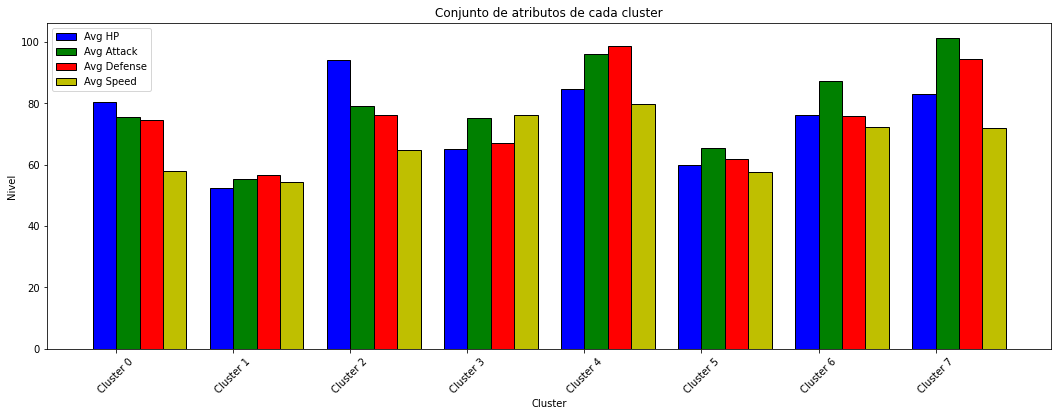

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))

HP = clustersDf['Avg HP']
Attack = clustersDf['Avg Attack']
Defense = clustersDf['Avg Defense']
Speed = clustersDf['Avg Speed']

n = len(clusters)
r = np.arange(n)
width = 0.2

plt.bar(r, HP, color = 'b',
        width = width, edgecolor = 'black',
        label='Avg HP')
plt.bar(r + width, Attack, color = 'g',
        width = width, edgecolor = 'black',
        label='Avg Attack')
plt.bar(r + width*2, Defense, color = 'r',
        width = width, edgecolor = 'black',
        label='Avg Defense')
plt.bar(r + width*3, Speed, color = 'y',
        width = width, edgecolor = 'black',
        label='Avg Speed')

plt.xlabel("Cluster")
plt.ylabel("Nivel")
plt.title("Conjunto de atributos de cada cluster")

plt.xticks(r + width/2,['Cluster {}'.format(i) for i in range(len(clusters))], rotation = 45)
plt.legend()

Se decidió que la fuerza de los pokemones está determinada por el promedio de los atributos HP, Attack, Defense y Speed juntos. Agrego este atributo al dataFrame

In [ ]:
clustersDf['Fuerza']=np.zeros(len(clustersDf))
for i in range(len(clusters)):
  clustersDf['Fuerza'][i]=(clustersDf['Avg HP'][i]+clustersDf['Avg Attack'][i]+clustersDf['Avg Defense'][i]+clustersDf['Avg Speed'][i])/4
print(clustersDf)

      Avg HP  Avg Attack  Avg Defense  Avg Speed     Fuerza
0  80.256410   75.435897    74.589744  57.923077  72.051282
1  52.242857   55.235714    56.735714  54.200000  54.603571
2  93.864865   79.108108    76.027027  64.621622  78.405405
3  65.017699   75.230088    67.053097  76.079646  70.845133
4  84.738095   95.833333    98.714286  79.666667  89.738095
5  59.923567   65.312102    61.828025  57.598726  61.165605
6  76.081633   87.306122    75.897959  72.316327  77.900510
7  83.111111  101.083333    94.416667  71.944444  87.638889


Grafico la fuerza por cluster

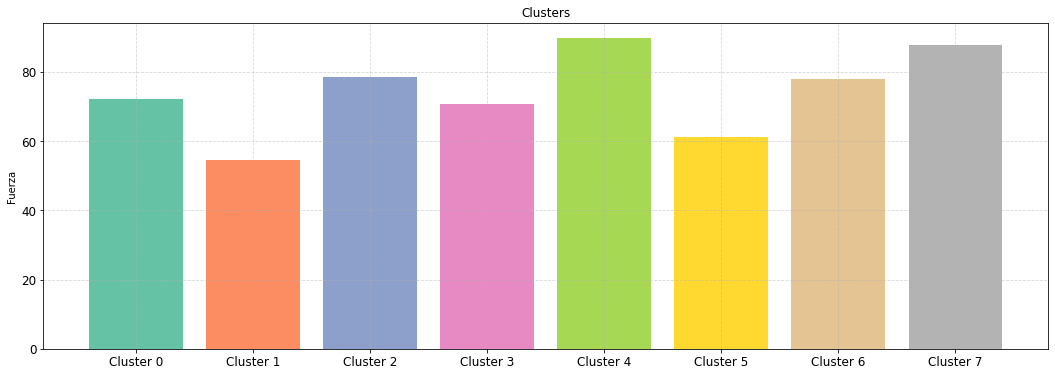

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
axs.grid('on', linestyle = 'dashed', alpha = 0.5)
axs.set_title('Clusters')
axs.set_ylabel('Fuerza')
axs.bar(x = [i for i in range(len(clusters))],
           height = clustersDf['Fuerza'],
           color = plt.get_cmap('Set2').colors
           )
axs.set_xticks([i for i in range(len(clusters))])
axs.set_xticklabels(['Cluster {}'.format(i) for i in range(len(clusters))])

axs.tick_params(axis='both', which='major', labelsize = 12)

plt.show()

Hay un cluster con los pokemones mas fuerte pero cual de todos es varía con las distintas ejecuciones del código.

Ejercicio 5

Defino un par de funciones auxiliares para hacer mas sencillo el código

In [ ]:
def tamano(img):
  tamano = 0
  for i in range(len(img)):
    if img[i] != 0:
      tamano+=1
  return tamano

def tamano_promedio_cluster(cluster):
  indices_cluster = df.loc[df['Name'].isin(cluster)].index
  tamano_cluster = 0
  for i in indices_cluster:
    tamano_cluster += tamano(data[i])
  return tamano_cluster/len(cluster)

Agrego el atributo tamaño al dataFrame

In [ ]:
clustersDf['Avg Size']=np.zeros(len(clustersDf))
for i in range(len(clusters)):
  clustersDf['Avg Size'][i]=tamano_promedio_cluster(clusters[i])
print(clustersDf)

      Avg HP  Avg Attack  Avg Defense  Avg Speed     Fuerza    Avg Size
0  80.256410   75.435897    74.589744  57.923077  72.051282  222.358974
1  52.242857   55.235714    56.735714  54.200000  54.603571  195.835714
2  93.864865   79.108108    76.027027  64.621622  78.405405  184.513514
3  65.017699   75.230088    67.053097  76.079646  70.845133  194.752212
4  84.738095   95.833333    98.714286  79.666667  89.738095  211.333333
5  59.923567   65.312102    61.828025  57.598726  61.165605  198.235669
6  76.081633   87.306122    75.897959  72.316327  77.900510  197.255102
7  83.111111  101.083333    94.416667  71.944444  87.638889  200.583333


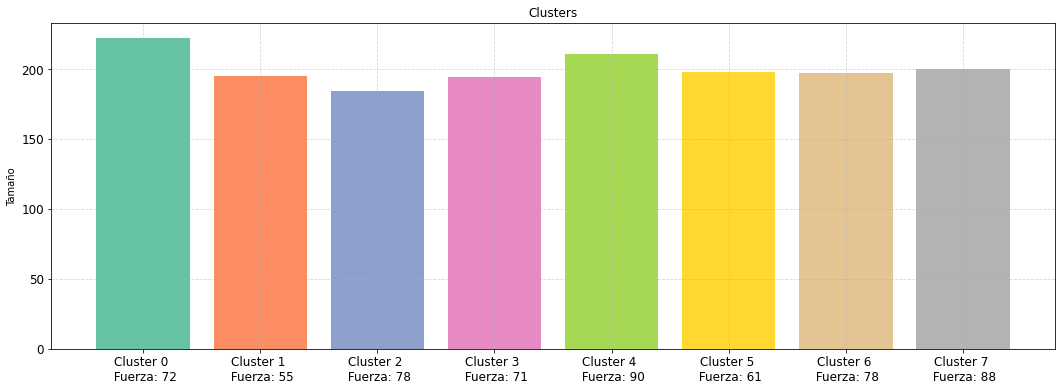

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
axs.grid('on', linestyle = 'dashed', alpha = 0.5)
axs.set_title('Clusters')
axs.set_ylabel('Tamaño')
axs.bar(x = [i for i in range(len(clusters))],
           height = clustersDf['Avg Size'].astype(int),
           color = plt.get_cmap('Set2').colors
           )
axs.set_xticks([i for i in range(len(clusters))])
axs.set_xticklabels(['Cluster {} \n Fuerza: {}'.format(i, round(clustersDf['Fuerza'][i])) for i in range(len(clusters))])

axs.tick_params(axis='both', which='major', labelsize = 12)

plt.show()

Puedo cambiar la escala para apreciar mejor las diferencias entre cada uno

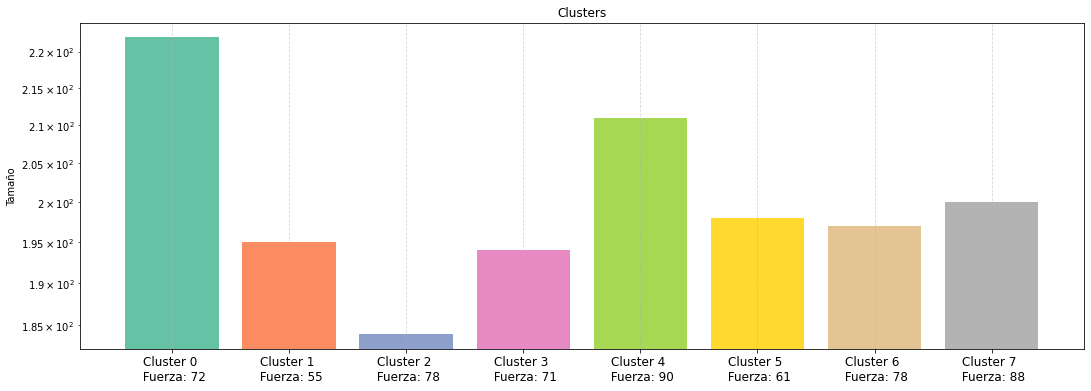

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
axs.grid('on', linestyle = 'dashed', alpha = 0.5)
axs.set_title('Clusters')
axs.set_ylabel('Tamaño')
axs.bar(x = [i for i in range(len(clusters))],
           height = clustersDf['Avg Size'].astype(int),
           color = plt.get_cmap('Set2').colors
           )
axs.set_xticks([i for i in range(len(clusters))])
axs.set_xticklabels(['Cluster {} \n Fuerza: {}'.format(i, round(clustersDf['Fuerza'][i])) for i in range(len(clusters))]
                       )
axs.set_yscale('log')

axs.tick_params(axis='both', which='major', labelsize = 12)

plt.show()

En varias ejecuciones del codigo sucede que el cluster de mayor tamaño es el mas fuerte.
Sin embargo, para todos los pokemones en general no podemos asegurar que haya una relacion fija entre tamaño y fuerza y parece ser que otros factores influyen también. Otras veces el cluster de pokemones más grandes no es el de los mas fuertes.

Ejercicio 6

Agrego un par de columnas con información sobre los pokemones legendarios en cada cluster

In [ ]:
clustersDf['Integrantes']=np.zeros(len(clustersDf))
clustersDf['Legendarios']=np.zeros(len(clustersDf))
clustersDf['Proporcion legendarios']=np.zeros(len(clustersDf))
clustersDf['Proporcion no legendarios']=np.zeros(len(clustersDf))

for i in range(len(clusters)):
  clustersDf['Integrantes'][i]=len(clusters[i])
  clustersDf['Legendarios'][i]=sum(df.loc[df['Name'].isin(clusters[i])]['Legendary'])
  clustersDf['Proporcion legendarios'][i]=clustersDf['Legendarios'][i]/clustersDf['Integrantes'][i]
  clustersDf['Proporcion no legendarios'][i]=(clustersDf['Integrantes'][i]-clustersDf['Legendarios'][i])/clustersDf['Integrantes'][i]

print(clustersDf)

      Avg HP  Avg Attack  Avg Defense  Avg Speed     Fuerza    Avg Size  \
0  80.256410   75.435897    74.589744  57.923077  72.051282  222.358974   
1  52.242857   55.235714    56.735714  54.200000  54.603571  195.835714   
2  93.864865   79.108108    76.027027  64.621622  78.405405  184.513514   
3  65.017699   75.230088    67.053097  76.079646  70.845133  194.752212   
4  84.738095   95.833333    98.714286  79.666667  89.738095  211.333333   
5  59.923567   65.312102    61.828025  57.598726  61.165605  198.235669   
6  76.081633   87.306122    75.897959  72.316327  77.900510  197.255102   
7  83.111111  101.083333    94.416667  71.944444  87.638889  200.583333   

   Integrantes  Legendarios  Proporcion legendarios  Proporcion no legendarios  
0         39.0          1.0                0.025641                   0.974359  
1        140.0          1.0                0.007143                   0.992857  
2         37.0          2.0                0.054054                   0.945946  


Hago gráficos de torta de las proporciones entre legendarios y no legendarios

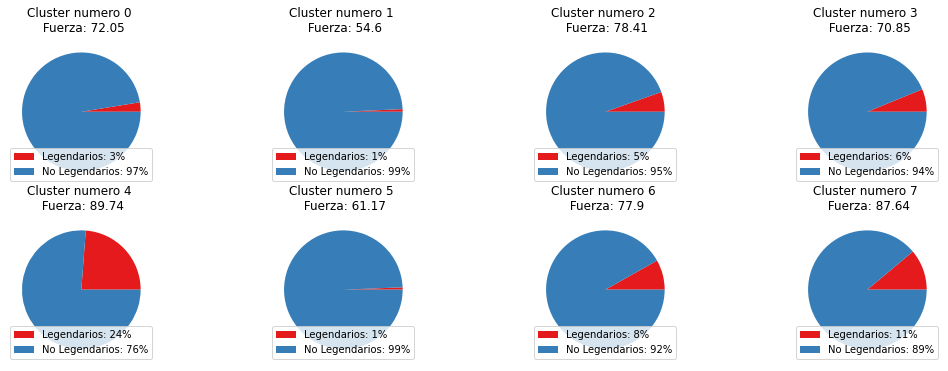

In [ ]:
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 6))
for i in range(int(len(clusters)/2)):
  axs[0][i].set_title('Cluster numero {} \n Fuerza: {}'.format(i,round(clustersDf['Fuerza'][i],2)))
  axs[0][i].pie([clustersDf['Proporcion legendarios'][i],clustersDf['Proporcion no legendarios'][i]],
           colors = plt.get_cmap('Set1').colors,pctdistance=1.1, labeldistance=1.2)
  axs[0][i].legend(['Legendarios: {}%'.format(round(100*clustersDf['Proporcion legendarios'][i])),
                    'No Legendarios: {}%'.format(round(100*clustersDf['Proporcion no legendarios'][i]))], loc = "lower center")
  axs[1][i].set_title('Cluster numero {} \n Fuerza: {}'.format(i+4,round(clustersDf['Fuerza'][i+4],2)))
  axs[1][i].pie([clustersDf['Proporcion legendarios'][i+4],clustersDf['Proporcion no legendarios'][i+4]],
           colors = plt.get_cmap('Set1').colors)
  axs[1][i].legend(['Legendarios: {}%'.format(round(100*clustersDf['Proporcion legendarios'][i+4])),
                    'No Legendarios: {}%'.format(round(100*clustersDf['Proporcion no legendarios'][i+4]))], loc = "lower center")
plt.show()

Podemos ver que el cluster mas fuerte tiene la mayor proporción de pokemones legendarios.